In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import yfinance as yf
# 한글폰트 출력 가능 코드
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("./end.csv")
df = pd.DataFrame(df)
df

,날짜,년도,월,전월대비 등락률,등락률(%),등락률label,외국인순매수,기관순매수,개인순매수,시가총액대비,동행지수,100기준동행지수,동행지수등락률,동행등락label
0,2005-01-31,2005,1,0.041053,4.105277,1,8538,984,-9523,42.9,99.0,0,-0.100000,0
1,2005-02-28,2005,2,0.084336,8.433577,1,14654,-8928,-5725,42.7,98.7,0,-0.303030,0
2,2005-03-31,2005,3,-0.045167,-4.516690,0,-20741,16920,3820,42.2,98.8,0,0.101317,1
3,2005-04-29,2005,4,-0.056313,-5.631266,0,-3243,955,2291,41.9,98.6,0,-0.202429,0
4,2005-05-31,2005,5,0.064644,6.464395,1,1048,17254,-18304,41.7,98.7,0,0.101420,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2021-11-30,2021,11,-0.044323,-4.432316,0,11342,-27380,16641,33.0,101.1,1,0.198216,1
202,2021-12-30,2021,12,0.048834,4.883389,1,15250,15846,-30452,33.5,101.8,1,0.692384,1
203,2022-01-28,2022,1,-0.105556,-10.555634,0,-389,6687,12674,32.7,102.4,1,0.589391,1
204,2022-02-28,2022,2,0.013457,1.345673,1,-6207,-3629,-10135,32.4,102.6,1,0.195312,1


In [4]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = df['등락률(%)']
feature1 = df['외국인순매수']
feature2 = df['개인순매수']
feature3 = df['동행지수']
feature = pd.concat([feature1, feature2,feature3], axis=1)

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(feature_add,target,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape) 

(164, 4)
(42, 4)


In [6]:

# sm OLS 적합
model = sm.OLS(y_train, X_train)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 등락률(%)   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     34.79
Date:                Tue, 03 May 2022   Prob (F-statistic):           2.30e-17
Time:                        23:08:54   Log-Likelihood:                -454.30
No. Observations:                 164   AIC:                             916.6
Df Residuals:                     160   BIC:                             929.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9640     27.983      2.893      0.004      25.701     136.227
외국인순매수      8.497e-05   1.71e-05      4.974      0.000    5.12e-05       0.000
개인순매수         -0.0001   2.74e-05     -4.824      0.000      -0.000    -7.8e-05
동행지수          -0.8017      0.279     -2.874      0.005      -1.353      -0.251
==============================================================================
Omnibus:                       10.497   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               15.191
Skew:                           0.366   Prob(JB):                     0.000503
Kurtosis:                       4.299   Cond. No.                     1.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

In [8]:
vif(feature_add)

,VIF Factor,features
0,8169.733844,const
1,1.272633,외국인순매수
2,1.255114,개인순매수
3,1.045182,동행지수


2. 회귀 식의 적합성 검정 : 잔차분석

2-1 오차항의 등분산성

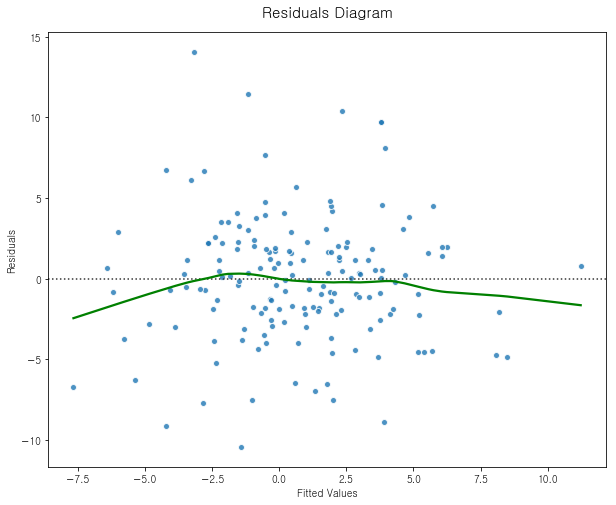

Lag_range multiplier statistic :  3.911
p-value :  0.271
f-value :  1.303
f p-value :  0.275
오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 5.0%에서 기각하지 못합니다.


In [9]:
def bp_test(fitted_model, sig_level):
    # 라이브러리 호출
    from statsmodels.compat import lzip
    from statsmodels.stats.api import het_breuschpagan
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # 변수설정
    yhat = fitted_model.fittedvalues
    subset = pd.concat([yhat, target], axis=1)
    subset.columns = ['yhat', 'target']
    names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
    test = het_breuschpagan(fitted_model.resid, fitted_model.model.exog)
    
    # 오차항의 등분산성을 확인하기 위한 플롯 형성
    fig = plt.figure(figsize= (10,8))
    sns.residplot(x = "yhat", y = "target", 
                data = subset, scatter_kws = {'edgecolor':"white"},
                lowess = True, line_kws = {"color":"green"})
    plt.title("Residuals Diagram", fontsize=15, y=1.02)
    plt.xlabel("Fitted Values")  
    plt.ylabel("Residuals")
    plt.show()

    for i in lzip(names, test):
        print(f'{i[0]} : {i[1] : .3f}')
        
    if test[1] > sig_level:
        print(f'오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각하지 못합니다.')
    else:
        print(f'오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각합니다.')
        print(f'오차항이 이분산(Heteroscedasticity)을 따르므로 선형회귀 모형의 가정에 어긋납니다.')

bp_test(fitted_model, 0.05)

2-2 오차항의 독립성

In [10]:
# 한줄씩 해보기
# 더빈왓슨 통계 (DW-test)
# 오차항의 독립성 검정으로 귀무가설은 '오차항이 독립적이다.'이다.
# statsmodel에서 도출한 OLS summary에서도 DW 값이 나오는데 2에 인접하는 경우, 오차항의 상관관계가 없는 것으로 나온다.
from statsmodels.stats.stattools import durbin_watson

durbin_watson(resids=fitted_model.resid)

2.144630761278785

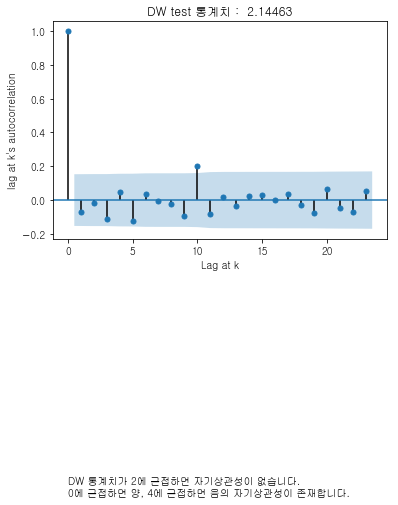

In [11]:
def autocorr_resid(fitted_model):
    from statsmodels.graphics.tsaplots import plot_acf
    import matplotlib.pyplot as plt
    from statsmodels.stats.stattools import durbin_watson

    # 오차항의 자기상관성 검정
    plot_acf(fitted_model.resid)
    plt.xlabel('Lag at k')
    plt.ylabel("lag at k's autocorrelation")
    plt.title(f'DW test 통계치 : {durbin_watson(resids=fitted_model.resid) : .5f}')
    plt.text(y=-1.75,x=0, s='DW 통계치가 2에 근접하면 자기상관성이 없습니다.\n0에 근접하면 양, 4에 근접하면 음의 자기상관성이 존재합니다.')
    plt.show()

autocorr_resid(fitted_model)   

2-3. 오차항의 정규성

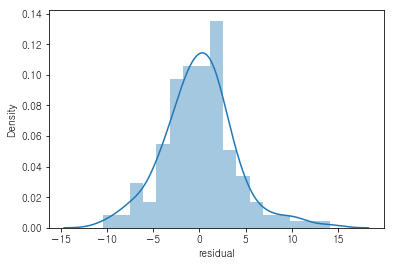

검정통계치 :  15.19112
p값 :  0.00050
오차항이 정규분포를 따른다는 귀무가설을 유의수준 5.0%에서 기각합니다.


In [12]:
def normal_test(fitted_model, sig_level):
    # 정규성 검정 (귀무가설 : 정규성를 따른다)
    from scipy.stats import jarque_bera
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    sns.distplot(fitted_model.resid)
    plt.xlabel('residual')
    plt.show()
    
    statistic, pvalue = jarque_bera(fitted_model.resid)
    print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')
    if pvalue > sig_level:
        print(f'오차항이 정규분포를 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각하지 못합니다.')
    else:
        print(f'오차항이 정규분포를 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각합니다.')
        
normal_test(fitted_model, .05)

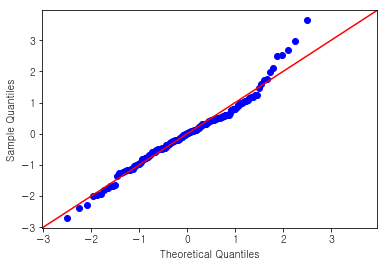

In [13]:
#학습데이터의 잔차 확인
 
res = fitted_model.resid
import matplotlib.pyplot as plt
#Q-Q plot # 정규분포확인
fig = sm.qqplot(res, fit=True, line='45')
plt.show()
# residual pattern 확인

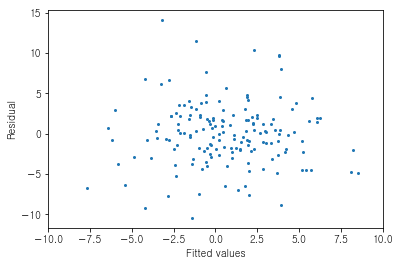

In [14]:
 
predY = fitted_model.predict(X_train)
 
fig = plt.scatter(predY,res,s=4)
plt.xlim(-10,10)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

In [15]:
#MSE 값 구하기
from sklearn.metrics import mean_squared_error
predY2 = fitted_model.predict(X_test)
MSE = mean_squared_error(y_true=y_test,y_pred=predY2)
print(MSE)

21.67912417020037


동행지수 음수

In [16]:
df_d=df[df['100기준동행지수']==0]
df_d

,날짜,년도,월,전월대비 등락률,등락률(%),등락률label,외국인순매수,기관순매수,개인순매수,시가총액대비,동행지수,100기준동행지수,동행지수등락률,동행등락label
0,2005-01-31,2005,1,0.041053,4.105277,1,8538,984,-9523,42.9,99.0,0,-0.100000,0
1,2005-02-28,2005,2,0.084336,8.433577,1,14654,-8928,-5725,42.7,98.7,0,-0.303030,0
2,2005-03-31,2005,3,-0.045167,-4.516690,0,-20741,16920,3820,42.2,98.8,0,0.101317,1
3,2005-04-29,2005,4,-0.056313,-5.631266,0,-3243,955,2291,41.9,98.6,0,-0.202429,0
4,2005-05-31,2005,5,0.064644,6.464395,1,1048,17254,-18304,41.7,98.7,0,0.101420,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2020-11-30,2020,11,0.142995,14.299460,1,29375,-39295,13950,35.9,99.4,0,0.505561,1
190,2020-12-30,2020,12,0.108874,10.887412,1,-3165,2170,-14288,36.5,99.4,0,0.000000,1
191,2021-01-29,2021,1,0.035755,3.575468,1,1343,-17232,-5094,36.5,99.2,0,-0.201207,0
192,2021-02-26,2021,2,0.012345,1.234456,1,-7847,-17293,8800,36.6,99.2,0,0.000000,1


In [62]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target_d = df_d['등락률(%)']
feature1_d = df_d['외국인순매수']
feature2_d = df_d['개인순매수']
#feature3_d = df_d['동행지수']
feature_d = pd.concat([feature1_d, feature2_d], axis=1)

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add_d = sm.add_constant(feature_d, has_constant='add')

In [63]:
X_train_d,X_test_d,y_train_d,y_test_d = train_test_split(feature_add_d,target_d,test_size=0.2, random_state=0)
print(X_train_d.shape)
print(X_test_d.shape) 

(53, 3)
(14, 3)


In [64]:
# sm OLS 적합
model_d = sm.OLS(y_train_d, X_train_d)
fitted_model_d = model_d.fit()

# summary 함수통해 결과출력
fitted_model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 등락률(%)   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     12.38
Date:                Tue, 03 May 2022   Prob (F-statistic):           4.30e-05
Time:                        23:16:20   Log-Likelihood:                -155.88
No. Observations:                  53   AIC:                             317.8
Df Residuals:                      50   BIC:                             323.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5024      0.653      3.831      0.000       1.191       3.814
외국인순매수         0.0001   3.76e-05      3.793      0.000    6.71e-05       0.000
개인순매수         -0.0001   5.11e-05     -2.469      0.017      -0.000   -2.35e-05
==============================================================================
Omnibus:                        1.749   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.708
Skew:                           0.368   Prob(JB):                        0.426
Kurtosis:                       2.518   Cond. No.                     1.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
vif(feature_add_d)

,VIF Factor,features
0,1.172756,외국인순매수
1,1.172756,개인순매수
2,1.005780,const



2. 회귀 식의 적합성 검정 : 잔차분석

2-1 오차항의 등분산성

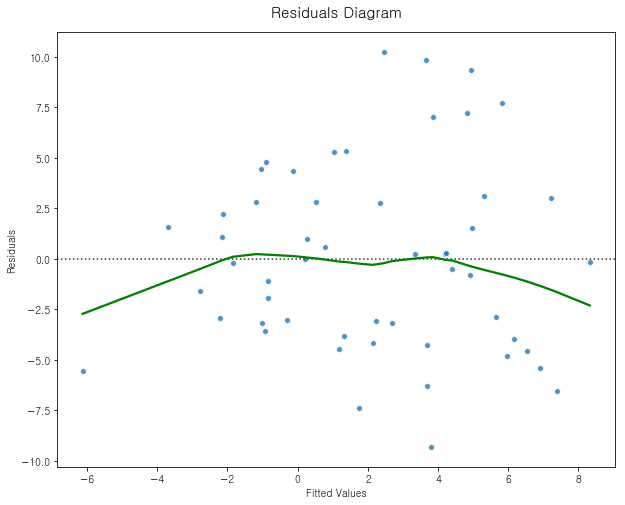

Lag_range multiplier statistic :  3.563
p-value :  0.168
f-value :  1.802
f p-value :  0.176
오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 5.0%에서 기각하지 못합니다.


In [66]:
bp_test(fitted_model_d, 0.05)

2-2 오차항의 독립성

In [76]:
# 한줄씩 해보기
# 더빈왓슨 통계 (DW-test)
# 오차항의 독립성 검정으로 귀무가설은 '오차항이 독립적이다.'이다.
# statsmodel에서 도출한 OLS summary에서도 DW 값이 나오는데 2에 인접하는 경우, 오차항의 상관관계가 없는 것으로 나온다.
from statsmodels.stats.stattools import durbin_watson

durbin_watson(resids=fitted_model_d.resid)

1.9389581996825815

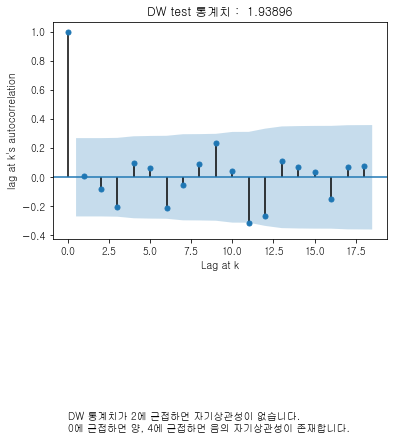

In [77]:
autocorr_resid(fitted_model_d)  

2-3. 오차항의 정규성

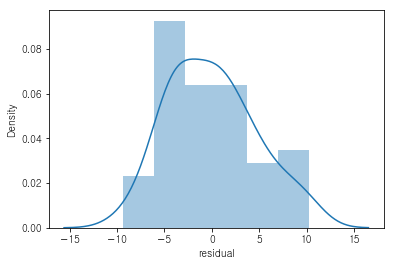

검정통계치 :  1.70757
p값 :  0.42580
오차항이 정규분포를 따른다는 귀무가설을 유의수준 5.0%에서 기각하지 못합니다.


In [78]:
normal_test(fitted_model_d, .05)

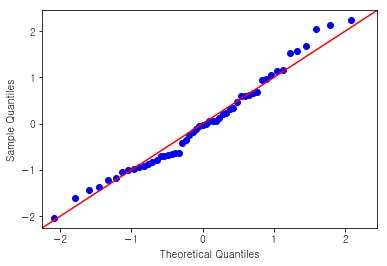

In [80]:

#학습데이터의 잔차 확인
 
res_d = fitted_model_d.resid

#Q-Q plot # 정규분포확인
fig = sm.qqplot(res_d, fit=True, line='45')
plt.show()
# residual pattern 확인

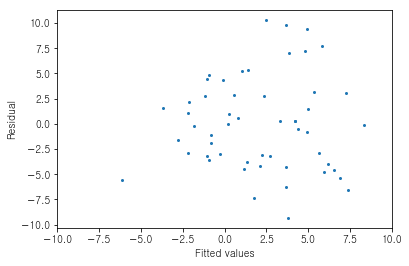

In [71]:
 
predY_d = fitted_model_d.predict(X_train_d)
 
fig = plt.scatter(predY_d,res_d,s=4)
plt.xlim(-10,10)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

In [73]:
#MSE 값 구하기
predY2_d = fitted_model_d.predict(X_test_d)
MSE = mean_squared_error(y_true=y_test_d,y_pred=predY2_d)
print(MSE)

41.36343430393099


동행지수 양수

In [28]:
df_u=df[df['100기준동행지수']==1]
df_u

,날짜,년도,월,전월대비 등락률,등락률(%),등락률label,외국인순매수,기관순매수,개인순매수,시가총액대비,동행지수,100기준동행지수,동행지수등락률,동행등락label
16,2006-05-30,2006,5,-0.071866,-7.186580,0,-28719,24132,11266,39.7,100.1,1,0.200200,1
17,2006-06-30,2006,6,-0.017113,-1.711310,0,-26621,23708,2914,39.4,100.0,1,-0.099900,0
21,2006-10-31,2006,10,-0.005002,-0.500214,0,-6491,11450,-217,37.5,100.5,1,1.005025,1
22,2006-11-30,2006,11,0.049584,4.958405,1,-16058,12492,3564,37.1,100.8,1,0.298507,1
23,2006-12-28,2006,12,0.001571,0.157100,1,2377,-10039,-95,37.2,101.0,1,0.198413,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2021-11-30,2021,11,-0.044323,-4.432316,0,11342,-27380,16641,33.0,101.1,1,0.198216,1
202,2021-12-30,2021,12,0.048834,4.883389,1,15250,15846,-30452,33.5,101.8,1,0.692384,1
203,2022-01-28,2022,1,-0.105556,-10.555634,0,-389,6687,12674,32.7,102.4,1,0.589391,1
204,2022-02-28,2022,2,0.013457,1.345673,1,-6207,-3629,-10135,32.4,102.6,1,0.195312,1


In [81]:

# target은 종속변수, feature는 독립변수와 같다.
target_u = df_u['등락률(%)']
feature1_u = df_u['외국인순매수']
feature2_u = df_u['개인순매수']
#feature3_u = df_u['동행지수']
feature_u = pd.concat([feature1_u, feature2_u], axis=1)

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add_u = sm.add_constant(feature_u, has_constant='add')

In [82]:
X_train_u,X_test_u,y_train_u,y_test_u = train_test_split(feature_add_u,target_u,test_size=0.2, random_state=0)
print(X_train_u.shape)
print(X_test_u.shape) 

(111, 3)
(28, 3)


In [83]:
# sm OLS 적합
model_u = sm.OLS(y_train_u, X_train_u)
fitted_model_u = model_u.fit()

# summary 함수통해 결과출력
fitted_model_u.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 등락률(%)   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     29.47
Date:                Tue, 03 May 2022   Prob (F-statistic):           6.13e-11
Time:                        23:26:24   Log-Likelihood:                -300.73
No. Observations:                 111   AIC:                             607.5
Df Residuals:                     108   BIC:                             615.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2640      0.356      0.741      0.460      -0.442       0.970
외국인순매수      9.301e-05   2.04e-05      4.566      0.000    5.26e-05       0.000
개인순매수         -0.0001   3.27e-05     -3.357      0.001      -0.000   -4.49e-05
==============================================================================
Omnibus:                       11.769   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               25.236
Skew:                           0.324   Prob(JB):                     3.31e-06
Kurtosis:                       5.244   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
vif(feature_add_u)

,VIF Factor,features
0,1.274119,개인순매수
1,1.274119,외국인순매수
2,1.041528,const


2. 회귀 식의 적합성 검정 : 잔차분석

2-1 오차항의 등분산성

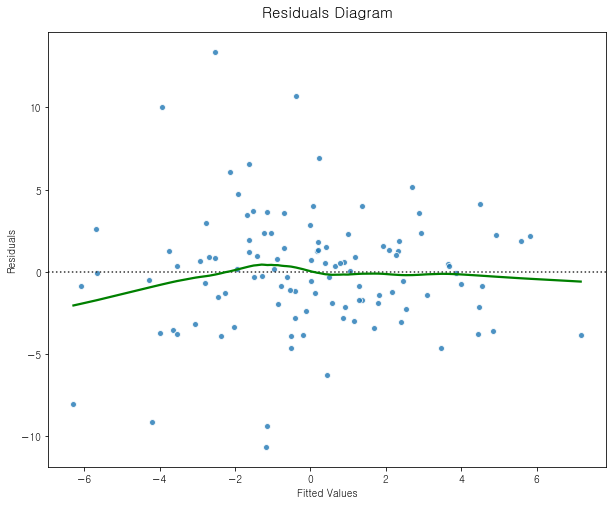

Lag_range multiplier statistic :  5.541
p-value :  0.063
f-value :  2.837
f p-value :  0.063
오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 5.0%에서 기각하지 못합니다.


In [86]:

bp_test(fitted_model_u, 0.05)

2-2 오차항의 독립성

In [87]:

durbin_watson(resids=fitted_model_u.resid)

2.006100270438323

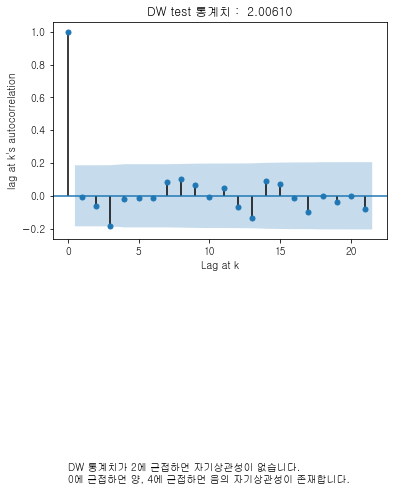

In [88]:
autocorr_resid(fitted_model_u) 

2-3. 오차항의 정규성

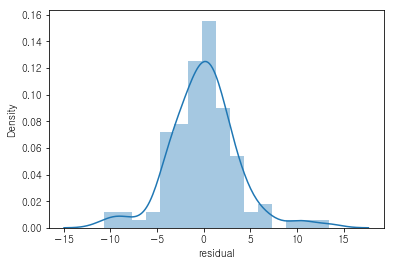

검정통계치 :  25.23556
p값 :  0.00000
오차항이 정규분포를 따른다는 귀무가설을 유의수준 5.0%에서 기각합니다.


In [89]:
normal_test(fitted_model_u, .05)

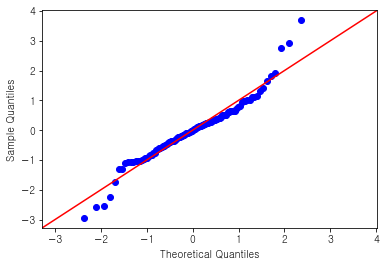

In [90]:
#학습데이터의 잔차 확인
 
res_u = fitted_model_u.resid

#Q-Q plot # 정규분포확인
fig = sm.qqplot(res_u, fit=True, line='45')
plt.show()
# residual pattern 확인

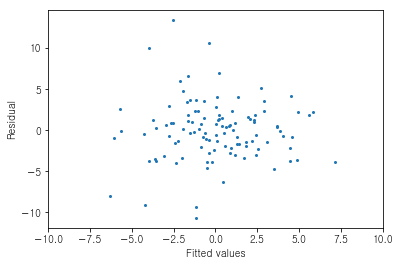

In [91]:
 
predY_u = fitted_model_u.predict(X_train_u)
 
fig = plt.scatter(predY_u,res_u,s=4)
plt.xlim(-10,10)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

In [92]:
#MSE 값 구하기
predY2_u = fitted_model_u.predict(X_test_u)
MSE = mean_squared_error(y_true=y_test_u,y_pred=predY2_u)
print(MSE)

10.826036922095623


경기 하강국면

In [40]:
df_dd=df[df['동행등락label']==0]
df_dd

,날짜,년도,월,전월대비 등락률,등락률(%),등락률label,외국인순매수,기관순매수,개인순매수,시가총액대비,동행지수,100기준동행지수,동행지수등락률,동행등락label
0,2005-01-31,2005,1,0.041053,4.105277,1,8538,984,-9523,42.9,99.0,0,-0.100000,0
1,2005-02-28,2005,2,0.084336,8.433577,1,14654,-8928,-5725,42.7,98.7,0,-0.303030,0
3,2005-04-29,2005,4,-0.056313,-5.631266,0,-3243,955,2291,41.9,98.6,0,-0.202429,0
5,2005-06-30,2005,6,0.039115,3.911519,1,450,14126,-14577,41.5,98.6,0,-0.101317,0
13,2006-02-28,2006,2,-0.020174,-2.017387,0,-5345,8520,-3174,40.1,99.7,0,-0.100200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2020-04-29,2020,4,0.109949,10.994850,1,-28972,8904,10534,36.7,97.8,0,-1.212121,0
183,2020-05-29,2020,5,0.042124,4.212446,1,-29413,7589,9418,36.3,97.0,0,-0.817996,0
191,2021-01-29,2021,1,0.035755,3.575468,1,1343,-17232,-5094,36.5,99.2,0,-0.201207,0
199,2021-09-30,2021,9,-0.040775,-4.077491,0,5979,-22257,9336,32.6,100.8,1,-0.099108,0


In [93]:
# target은 종속변수, feature는 독립변수와 같다.
target_dd = df_dd['등락률(%)']
feature1_dd = df_dd['외국인순매수']
feature2_dd = df_dd['개인순매수']
#feature3_dd = df_dd['동행지수']

feature_dd = pd.concat([feature1_dd, feature2_dd], axis=1)

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add_dd = sm.add_constant(feature_dd, has_constant='add')

In [94]:
X_train_dd,X_test_dd,y_train_dd,y_test_dd = train_test_split(feature_add_dd,target_dd,test_size=0.2, random_state=0)
print(X_train_dd.shape)
print(X_test_dd.shape) 

(57, 3)
(15, 3)


In [95]:
# sm OLS 적합
model_dd = sm.OLS(y_train_dd, X_train_dd)
fitted_model_dd = model_dd.fit()

# summary 함수통해 결과출력
fitted_model_dd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 등락률(%)   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     10.16
Date:                Tue, 03 May 2022   Prob (F-statistic):           0.000180
Time:                        23:36:11   Log-Likelihood:                -156.81
No. Observations:                  57   AIC:                             319.6
Df Residuals:                      54   BIC:                             325.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2210      0.530      0.417      0.679      -0.842       1.284
외국인순매수      5.981e-05   3.05e-05      1.960      0.055   -1.36e-06       0.000
개인순매수         -0.0001   4.73e-05     -2.720      0.009      -0.000   -3.38e-05
==============================================================================
Omnibus:                       13.659   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.525
Skew:                           0.999   Prob(JB):                     0.000425
Kurtosis:                       4.596   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
vif(feature_add_dd)

,VIF Factor,features
0,1.329064,개인순매수
1,1.329064,외국인순매수
2,1.059772,const


2. 회귀 식의 적합성 검정 : 잔차분석

2-1 오차항의 등분산성

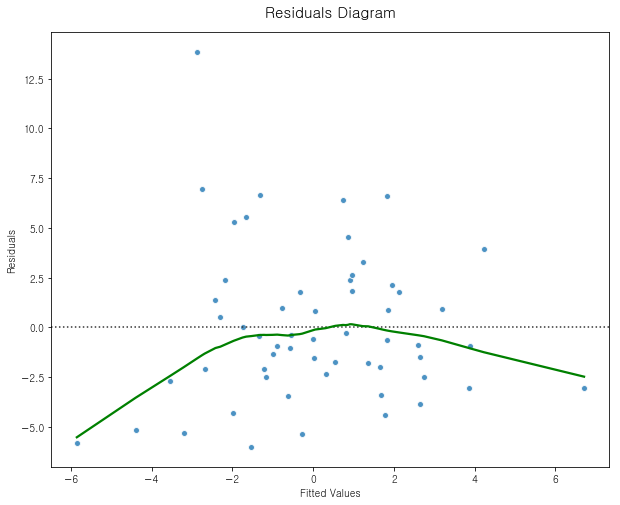

Lag_range multiplier statistic :  4.941
p-value :  0.085
f-value :  2.563
f p-value :  0.086
오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 5.0%에서 기각하지 못합니다.


In [96]:
bp_test(fitted_model_dd, 0.05)

2-2 오차항의 독립성

In [97]:
durbin_watson(resids=fitted_model_dd.resid)

1.6460843685410764

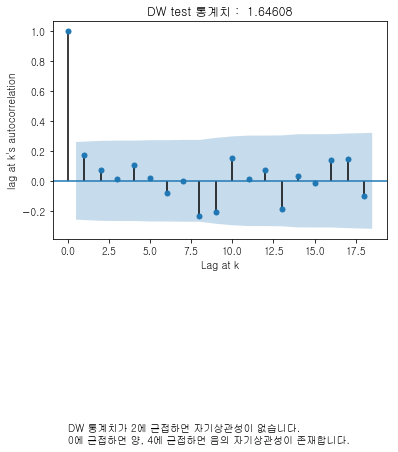

In [98]:
autocorr_resid(fitted_model_dd)

2-3. 오차항의 정규성

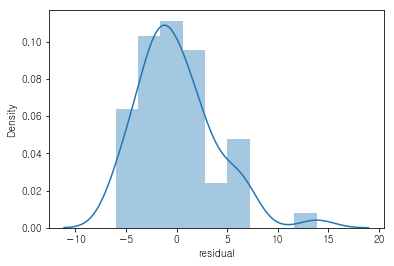

검정통계치 :  15.52472
p값 :  0.00043
오차항이 정규분포를 따른다는 귀무가설을 유의수준 5.0%에서 기각합니다.


In [99]:
normal_test(fitted_model_dd, .05)

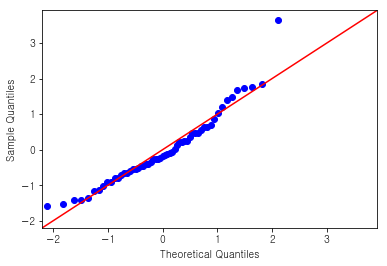

In [100]:
#학습데이터의 잔차 확인
 
res_dd = fitted_model_dd.resid

#Q-Q plot # 정규분포확인
fig = sm.qqplot(res_dd, fit=True, line='45')
plt.show()
# residual pattern 확인

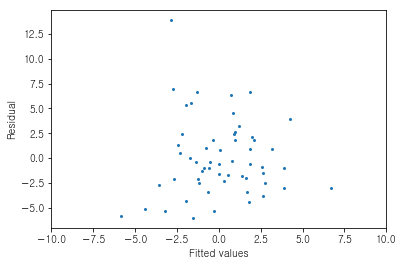

In [101]:
 
predY_dd = fitted_model_dd.predict(X_train_dd)
 
fig = plt.scatter(predY_dd,res_dd,s=4)
plt.xlim(-10,10)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

In [102]:
#MSE 값 구하기
predY2_dd = fitted_model_dd.predict(X_test_dd)
MSE = mean_squared_error(y_true=y_test_dd,y_pred=predY2_dd)
print(MSE)

15.715022614097306


경기상승국면

In [51]:
df_uu=df[df['동행등락label']==1]
df_uu

,날짜,년도,월,전월대비 등락률,등락률(%),등락률label,외국인순매수,기관순매수,개인순매수,시가총액대비,동행지수,100기준동행지수,동행지수등락률,동행등락label
2,2005-03-31,2005,3,-0.045167,-4.516690,0,-20741,16920,3820,42.2,98.8,0,0.101317,1
4,2005-05-31,2005,5,0.064644,6.464395,1,1048,17254,-18304,41.7,98.7,0,0.101420,1
6,2005-07-29,2005,7,0.102295,10.229534,1,16160,3011,-19173,41.9,98.7,0,0.101420,1
7,2005-08-31,2005,8,-0.025160,-2.516002,0,-10990,13974,-2986,41.9,98.7,0,0.000000,1
8,2005-09-30,2005,9,0.127090,12.708968,1,-8341,17440,-9101,41.4,98.7,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2021-10-29,2021,10,-0.031980,-3.197976,0,-16287,22499,-7809,32.5,100.9,1,0.099206,1
201,2021-11-30,2021,11,-0.044323,-4.432316,0,11342,-27380,16641,33.0,101.1,1,0.198216,1
202,2021-12-30,2021,12,0.048834,4.883389,1,15250,15846,-30452,33.5,101.8,1,0.692384,1
203,2022-01-28,2022,1,-0.105556,-10.555634,0,-389,6687,12674,32.7,102.4,1,0.589391,1


In [116]:
# target은 종속변수, feature는 독립변수와 같다.
target_uu = df_uu['등락률(%)']
feature1_uu = df_uu['외국인순매수']
feature2_uu = df_uu['개인순매수']
#feature3_uu = df_uu['동행지수']
feature_uu = pd.concat([feature1_uu, feature2_uu], axis=1)

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add_uu = sm.add_constant(feature_uu, has_constant='add')

In [117]:
X_train_uu,X_test_uu,y_train_uu,y_test_uu = train_test_split(feature_add_uu,target_uu,test_size=0.2, random_state=0)
print(X_train_uu.shape)
print(X_test_uu.shape) 

(107, 3)
(27, 3)


In [118]:
# sm OLS 적합
model_uu = sm.OLS(y_train_uu, X_train_uu)
fitted_model_uu = model_uu.fit()

# summary 함수통해 결과출력
fitted_model_uu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 등락률(%)   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     22.81
Date:                Tue, 03 May 2022   Prob (F-statistic):           6.10e-09
Time:                        23:47:35   Log-Likelihood:                -307.81
No. Observations:                 107   AIC:                             621.6
Df Residuals:                     104   BIC:                             629.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8721      0.422      2.065      0.041       0.035       1.710
외국인순매수         0.0001   2.13e-05      4.866      0.000    6.15e-05       0.000
개인순매수       -8.57e-05   3.52e-05     -2.436      0.017      -0.000   -1.59e-05
==============================================================================
Omnibus:                        9.406   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.254
Skew:                           0.549   Prob(JB):                      0.00593
Kurtosis:                       4.047   Cond. No.                     2.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
vif(feature_add_uu)

,VIF Factor,features
0,1.185044,개인순매수
1,1.185044,외국인순매수
2,1.005953,const


2. 회귀 식의 적합성 검정 : 잔차분석

2-1 오차항의 등분산성

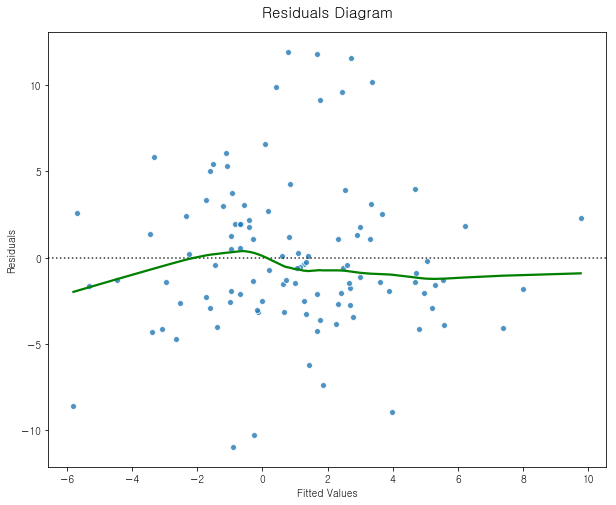

Lag_range multiplier statistic :  0.474
p-value :  0.789
f-value :  0.231
f p-value :  0.794
오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 5.0%에서 기각하지 못합니다.


In [106]:
bp_test(fitted_model_uu, 0.05)

2-2 오차항의 독립성

In [121]:
durbin_watson(resids=fitted_model_uu.resid)

1.999316163442424

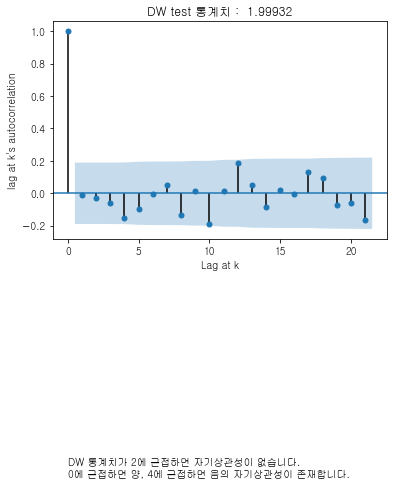

In [122]:
autocorr_resid(fitted_model_uu)

2-3. 오차항의 정규성

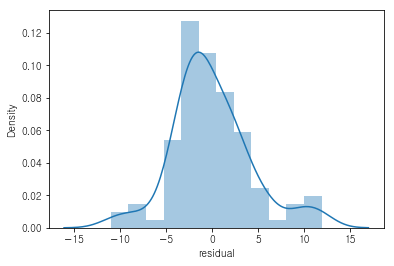

검정통계치 :  10.25393
p값 :  0.00593
오차항이 정규분포를 따른다는 귀무가설을 유의수준 5.0%에서 기각합니다.


In [123]:
normal_test(fitted_model_uu, .05)

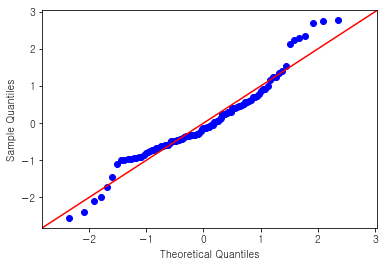

In [124]:
#학습데이터의 잔차 확인
 
res_uu = fitted_model_uu.resid

#Q-Q plot # 정규분포확인
fig = sm.qqplot(res_uu, fit=True, line='45')
plt.show()
# residual pattern 확인

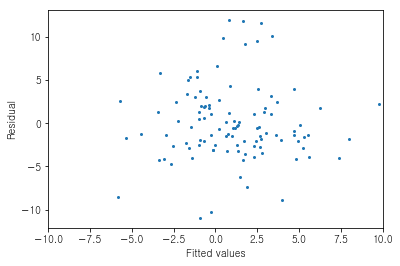

In [111]:
 
predY_uu = fitted_model_uu.predict(X_train_uu)
 
fig = plt.scatter(predY_uu,res_uu,s=4)
plt.xlim(-10,10)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

In [120]:
#MSE 값 구하기
predY2_uu = fitted_model_uu.predict(X_test_uu)
MSE = mean_squared_error(y_true=y_test_uu,y_pred=predY2_uu)
print(MSE)

16.279845345969623
